In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [3]:
#matplotlib.use('ngAgg')

## Line plot

In [4]:
s1 = np.random.randn(10)
s2 =np.arange(0,100, 10)
print(s1)
print(s2)

[ 0.3249457   0.28937759  1.12530836  0.26678206  1.14145738 -0.72159821
  0.5823998  -0.78492617 -0.01778505  0.09070669]
[ 0 10 20 30 40 50 60 70 80 90]


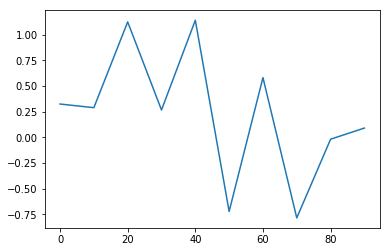

In [5]:
plt.plot(s2, s1)

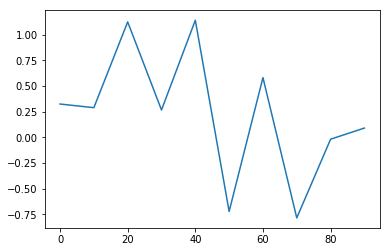

In [6]:
s = pd.Series(s1, index=s2)
s.plot()

In [7]:
df = pd.DataFrame(np.random.randn(10,4), index=np.arange(0,100, 10))

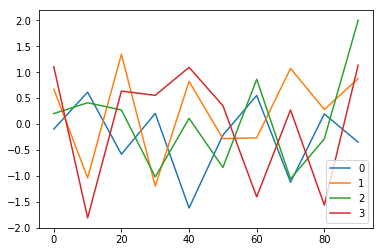

In [8]:
df.plot()

## bar plot

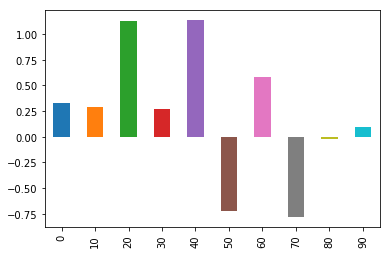

In [9]:
s.plot(kind='bar')

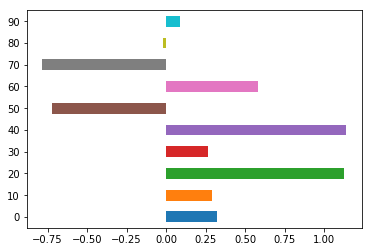

In [10]:
s.plot(kind='barh')

## Histogram

In [11]:
x = np.arange(0,100,1)

In [12]:
s3 = pd.Series(x)

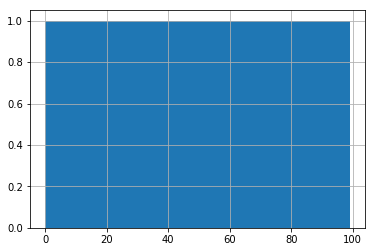

In [13]:
s3.hist(bins=100)

## Scatter plot

In [14]:
x1 = np.random.normal(0, 1, (100,1))
x2 = np.random.normal(1, 4, (100,1))
X = np.concatenate((x1, x2), axis=1)
df3 = pd.DataFrame(X, columns=['x1','x2'])

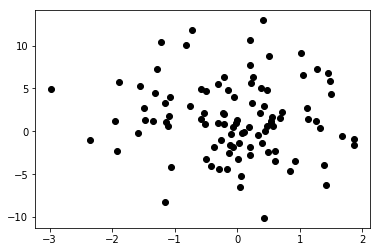

In [80]:
plt.scatter(df3['x1'], df3['x2'], color='black')

In [63]:
from sklearn.datasets import load_digits
digits= load_digits()

from sklearn.manifold import Isomap
iso = Isomap(n_components=3)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

(1797, 3)

* c : color, sequence, or sequence of color, optional
* cmap : Colormap, optional, default: None
* alpha(투명도) : scalar, optional, default: None / between 0 (transparent) and 1 (opaque).
* edgecolors : {'face', 'none', None} or color or sequence of color, optional.

* Colormaps
https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
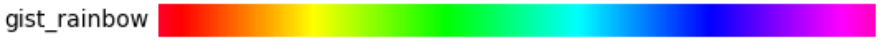

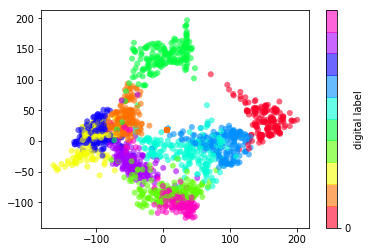

In [64]:
plt.scatter(data_projected[:,0], data_projected[:,1], c=digits.target, edgecolor='none', alpha=0.6, 
            cmap=plt.cm.get_cmap('gist_rainbow', 10))
plt.colorbar(label='digital label', ticks=range(1))

### 산점도

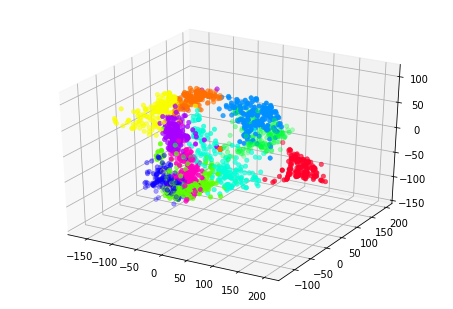

In [77]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(data_projected[:,0], data_projected[:,1], data_projected[:,2], c=digits.target, cmap='gist_rainbow', linewidth=0.5)

## Plot 모양

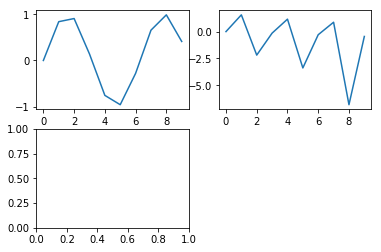

In [16]:
x = np.arange(0,10,1)
fig = plt.figure()

ax1 = fig.add_subplot(2,2,1)
plt.plot(x, np.sin(x))
ax2 = fig.add_subplot(2,2,2)
plt.plot(x, np.tan(x))
ax3 = fig.add_subplot(2,2,3)

## 여러개 출력하기
* fig
* axes 설정한 크기와 같은 shape의 리스트로 각요소에 subplot객체가 들어가 있음. 

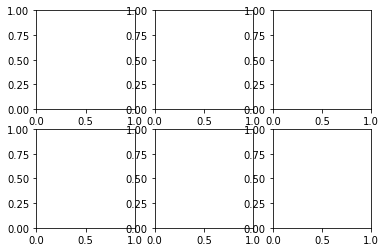

In [17]:
fig, ax = plt.subplots(2,3)


In [18]:
ax[0,0].plot(x, np.sin(x))
ax[0,1].plot(x, np.cos(x))
ax[0,2].plot(x, np.tan(x))

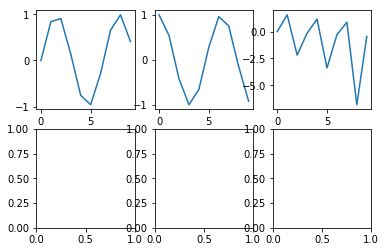

In [19]:
fig

In [20]:
ax

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdd72b18eb8>,
      dtype=object)

## plot 꾸미기

color
 
"b" blue
"g" green
"r" red
"c" cyan
"m" magenta
"y" yellow
"k" black
"w" white

marker

"." point
"," pixel
"o" circle
"v" triangle_down
"^" triangle_up
"<" triangle_left
">" triangle_right
"8" octagon
"s" square
"p" pentagon
"*" star
"h" hexagon
"+" plus
"x" x
"D" diamond

line style
값 라인 스타일

"-" solid line
"--" dashed line
"-." dash-dotted line
":" dotted line
"None" draw nothing

In [21]:
ax[0,1].set_xticks([0,250,500,750,1000])
ax[0,1].set_xticklabels(['one', 'two', 'three'])

[Text(-5,0,'one'), Text(0,0,'two'), Text(5,0,'three')]

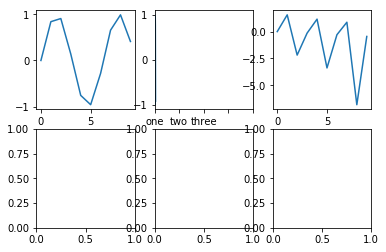

In [22]:
fig

## 이미지로 저장

In [23]:
fig.savefig('result.png')

## 3차원 함수 시각화

In [24]:
def f(x,y):
    return np.sin(x) ** 10 + np.cos(10+y * x) * np.cos(x)

In [25]:
x = np.linspace(0,5,50)
y = np.linspace(0,5,40)
X, Y = np.meshgrid(x,y)
Z = f(X,Y)

##### contour

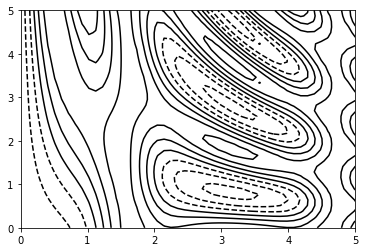

In [26]:
plt.contour(X, Y, Z, colors='black')

* 음수값은 점선으로 양수값은 실선

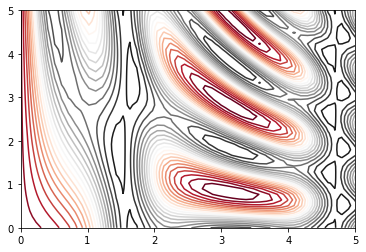

In [27]:
plt.contour(X, Y, Z, 20, cmap='RdGy')

##### coutourf

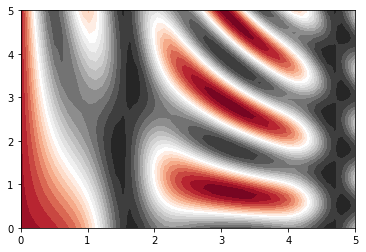

In [28]:
plt.contourf(X, Y, Z, 20, cmap='RdGy')

### 플롯에 이미지 표시

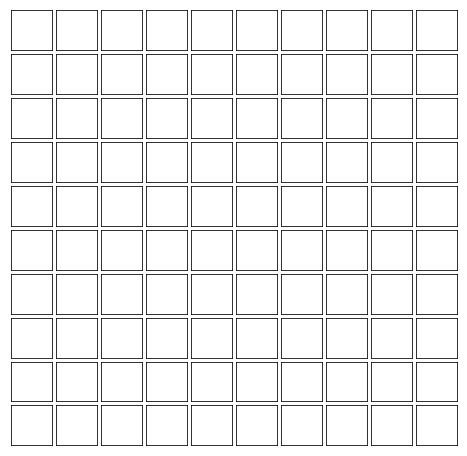

In [29]:
fig, axes = plt.subplots(10,10, figsize=(8,8), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))

In [31]:

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]), transform=ax.transAxes, color='green')

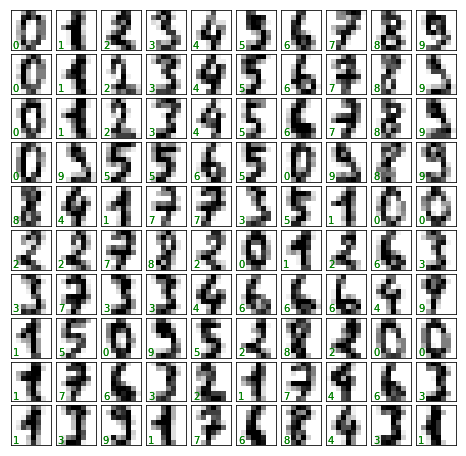

In [33]:
fig

### 3차원 등고선 플롯